<a href="https://colab.research.google.com/github/peri0701/Bauklotz-Objekterkennungsmodell/blob/main/Yolov8s_Bauklotz_Modelltraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

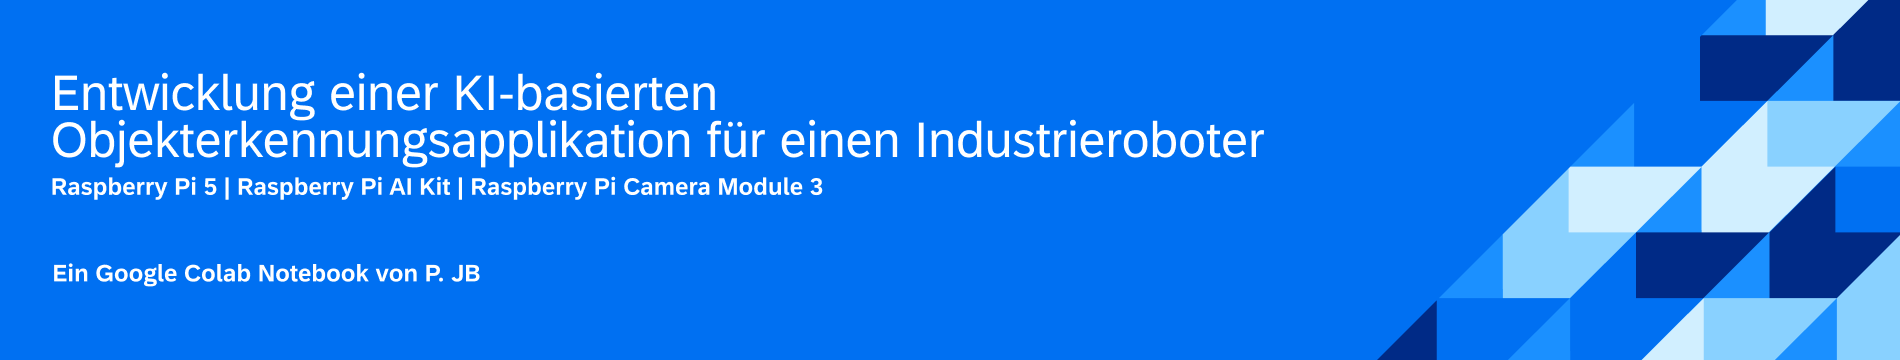


# **YOLOv8s-Modelltraining – Anwendung: Bauklotz**

---


[![GitHub](https://img.shields.io/badge/Open%20in%20GitHub-grey?style=flat-square&logo=github&logoColor=white&labelColor=grey&color=black)](https://github.com/ultralytics/ultralytics)

Das **Ultralytics YOLOv8-Modell** gehört zu eistungsstärksten Varianten der YOLO (You Only Look Once)-Reihe für Objekterkennung und Bildsegmentierung.
Es bietet flexible Einsatzmöglichkeiten und kann auf einer Vielzahl von Hardwareplattformen genutzt werden – von **CPUs** bis hin zu leistungsstarken **GPUs**.

Das hier bereitgestellte Notebook basiert auf der [Roboflow-YOLOv8-Notebook-Vorlage](https://colab.research.google.com/github/roboflow-ai/notebooks/blob/main/notebooks/train-yolov8-object-detection-on-custom-dataset.ipynb) und wurde speziell für diese Arbeit angepasst. Es führt schrittweise durch die zentralen Prozesse – von der Installation der erforderlichen Tools bis hin zur Validierung und Speicherung des trainierten Modells.


Der ausgeblendete Code zeigt die Ausgaben des letzten Trainingslaufs mit meinem benutzerdefinierten Datensatz

**Viel Erfolg beim Modelltraining!**

## **Vor dem Start des Modelltrainings zu beachten**
---
Die T4 GPU, die in Colab kostenlos verfügbar ist, wurde speziell für KI-Anwendungen optimiert. Sie bietet eine gute Balance aus Rechenleistung und Energieeffizienz und ist ideal für das Modelltraining geeignet.

Um die GPU-Beschleunigung zu aktivieren:

1.   Öffne die **Notebook-Einstellungen** über das Menü **„Bearbeiten“**.
2.   Wähle unter **Hardware-Beschleuniger** die Option **T4 GPU** und speichere die Einstellung.

### **Wichtige Hinweise:**

*   **Kostenlose Nutzung:** Die GPU-Ressourcen in Colab sind zeitlich begrenzt. Die verbleibende Laufzeit kann unter **„Ressourcen“** eingesehen werden (siehe Bild).
*   **Ergebnisse sichern:** Um Datenverluste zu vermeiden, sollten die generierten Ergebnisse heruntergeladen werden.


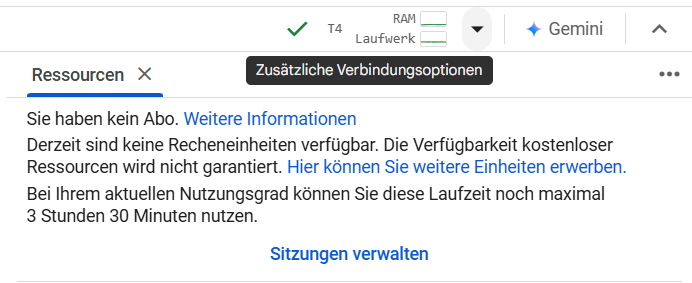

## **GPU-Einstellung überprüfen**

Mit dem Befehl `!nvidia-smi` kann überprüft werden, ob eine GPU aktiv ist. Der Befehl liefert Informationen wie das GPU-Modell, die Speichernutzung und die aktuelle Auslastung. Diese Überprüfung stellt sicher, dass die GPU für das Training bereitsteht.

In [ ]:
!nvidia-smi

Mon Dec 30 16:16:29 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

##**Festlegen des Arbeitsverzeichnisses**
Der folgende Code definiert das aktuelle Arbeitsverzeichnis des Notebooks, das in Google Colab standardmäßig auf `/content` gesetzt ist. Dies gewährleistet, dass alle nachfolgenden Dateioperationen im vorgesehenen Verzeichnis ausgeführt werden.

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## **Ultralytics installieren**

Hier wird das YOLOv8-Framework installiert, das von Ultralytics bereitgestellt wird. Die benötigten Pakete, einschließlich `ultralytics` und weiterer Abhängigkeiten, werden über `pip` installiert, um die Entwicklungsumgebung für das Modelltraining vollständig einzurichten.

In [ ]:
!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)


In [ ]:
from ultralytics import YOLO #Dieser Import bringt die YOLO-Klasse aus der ultralytics-Bibliothek in die aktuelle Umgebung.
#Mit der YOLO-CLI könnrn dann Modelle trainiert, evaluiert und zur Objekterkennung eingesetzt werden.

from IPython.display import display, Image

## **Benutzerdefinierter Datensatz herunterladen**

In diesem Abschnitt wird der zuvor erstellte Datensatz aus Roboflow im YOLOv8-Format heruntergeladen und im zuvor festgelegten Arbeitsverzeichnis gespeichert. Der Zugriff erfolgt über eine individuelle API, die vertraulich behandelt werden sollte, um unbefugten Zugriff auf das Roboflow-Konto und die darin gespeicherten Daten zu verhindern. Der heruntergeladene Datensatz wird anschließend für das Training verwendet.

Mein finaler Datensatz ist, wie bereits auf der GitHub-Seite gezeigt, über die Suche auf [Roboflow Universe](https://universe.roboflow.com/) oder direkt über diesen [Link](https://universe.roboflow.com/bauklotz/bauklotz-c8zsq/dataset/1) einzusehen.


In [ ]:
%cd {HOME}

#Die folgenden Codezeilen sind die meines Bauklotz Datensatzes, ohne die API, diese müssen mit den eigenen Codezeilen ersetzt werden.
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key)
project = rf.workspace("bauklotz").project("bauklotz-c8zsq")
version = project.version(1)
dataset = version.download("yolov8")



/content
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to bauklotz-1 in yolov8:: 100%|██████████| 2472/2472 [00:00<00:00, 6559.34it/s]


## **Benutzerdefiniertes Modelltraining**

In diesem Abschnitt wird das YOLOv8-Modell (`yolov8s.pt`) auf einem benutzerdefinierten Datensatz trainiert. Die Trainingseinstellungen umfassen 200 Epochen und eine Bildgröße von 640x640 Pixeln. Die Ergebnisse des Trainings, einschließlich Konfusionsmatrizen und Verlustkurven, wurden im Arbeitsverzeichnis im Ordner `runs/detect/train2` gespeichert.

Eine detaillierte Übersicht der hier im Training vorwendeten Variablen und deren Bedeutung ist in meiner Bachelorarbeit dokumentiert.



In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=200 imgsz=640 plots=True

/content
New https://pypi.org/project/ultralytics/8.3.54 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/bauklotz-1/data.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show

## **Validierung des Modells**


Dieser Code validiert das trainierte Modell anhand des Datensatzes im `val`-Ordner und berechnet Metriken wie **Präzision**, **Recall** und **mAP**. Die Ergebnisse werden im `runs`-Ordner gespeichert und dienen der Bewertung der Modellleistung. Ohne die Ausführung dieses Codes werden keine Validierungsdaten im `runs`-Ordner erzeugt.


In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/bauklotz-1/valid/labels.cache... 246 images, 0 backgrounds, 0 corrupt: 100% 246/246 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 16/16 [02:53<00:00, 10.87s/it]
                   all        246        411      0.995      0.995      0.995       0.96
Speed: 5.2ms preprocess, 694.6ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## **Inferenz des Modells testen**

Dieser Code führt die Inferenz auf dem Datensatz enthaltenem `test` Ordner durch und speichert die Ergebnisse im `runs`-Ordner. Der Parameter `save=True` sorgt dafür, dass die Vorhersagen gespeichert werden. Gleichzeitig legt der `conf`-Wert fest, ab welcher Konfidenz ein Objekt als erkannt gilt. Ohne die Ausführung dieses Codes werden keine Inferenz-Ergebnisse im `runs`-Ordner erstellt.

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs

image 1/123 /content/bauklotz-1/test/images/102_png_jpg.rf.637b3afd2ff537e05af366cbfa905a5b.jpg: 640x640 2 Bauklotzs, 487.2ms
image 2/123 /content/bauklotz-1/test/images/102_png_jpg.rf.83f3b7324952bbf92d0b0466078d938b.jpg: 640x640 2 Bauklotzs, 459.1ms
image 3/123 /content/bauklotz-1/test/images/102_png_jpg.rf.b247c1afbec3ff5fe253908a41891c77.jpg: 640x640 2 Bauklotzs, 510.9ms
image 4/123 /content/bauklotz-1/test/images/103_png_jpg.rf.dc888caf46bdc6e27d3520a1f5ed37f6.jpg: 640x640 2 Bauklotzs, 487.1ms
image 5/123 /content/bauklotz-1/test/images/109_png_jpg.rf.4d271396ea6401c7071fba36d19f5427.jpg: 640x640 2 Bauklotzs, 468.6ms
image 6/123 /content/bauklotz-1/test/images/10_jpg.rf.0092fa0d3235f9f8bc25283d98ac815e.jpg: 640x640 1 Bauklotz, 467.1ms
image 7/123 /content/bauklotz-1/test/images/114_png_jpg.rf.9338a1a26e504

**Ergebnisse der Inferenz anzeigen:** Der folgende Code zeigt die Ergebnisse der Inferenz an, indem er Bilder aus dem Ordner `runs/detect` lädt, auf denen die vom Modell erkannten Objekte durch Bounding Boxes und Labels visualisiert werden.

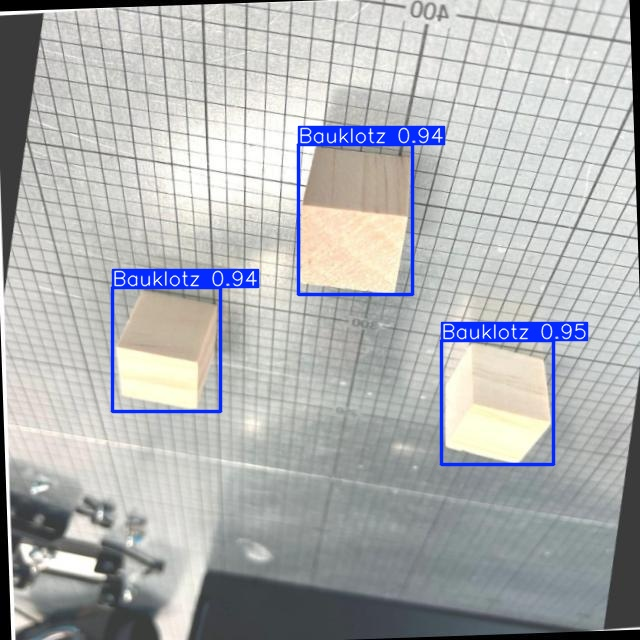

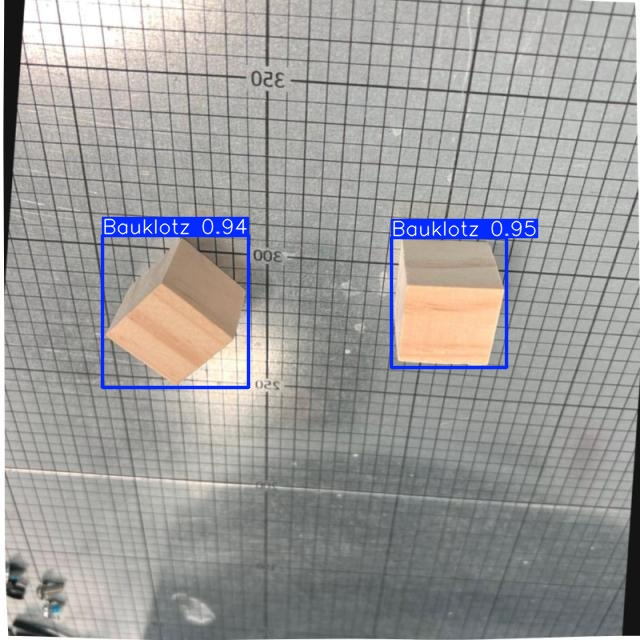

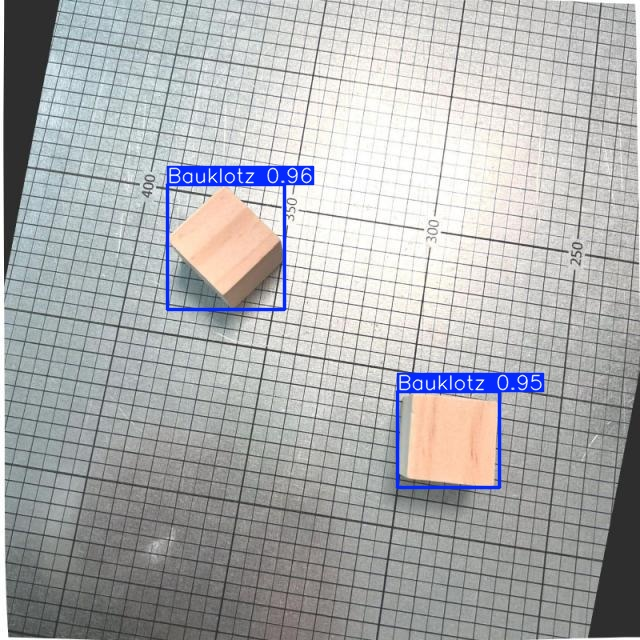

In [ ]:
import glob
from IPython.display import Image, display

# Der Basis-Pfad zu den gespeicherten Ergebnissen wird als
base_path = '/content/runs/detect/'

# Alle Unterordner, die mit predict beginnen, werden aus dem Basis-Pfad gefiltert.
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Der neueste Ordner basierend auf dem Änderungszeitpunkt wird identifiziert.
latest_folder = max(subfolders, key=os.path.getmtime)

# Die ersten drei Bilddateien (*.jpg) aus dem neuesten Ordner werden geladen.
image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Die geladenen Bilder werden mit einer Breite von 600 Pixeln im Notebook angezeigt.
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

## 🏆 **Herunterladen der Ergebnisse**



Der Ordner `runs`, der die Ergebnisse von Training, Validierung und Inferenz enthält, wird in eine ZIP-Datei komprimiert und anschließend heruntergeladen. Dies dient der Sicherung der Daten, da die temporären Speicher in Google Colab nach der Sitzung gelöscht werden. Der Befehl `files.download` ermöglicht den direkten Download der Datei auf den lokalen Computer.



In [ ]:
!zip -r runs.zip runs/
from google.colab import files
files.download('runs.zip')


updating: runs/ (stored 0%)
updating: runs/detect/ (stored 0%)
updating: runs/detect/train/ (stored 0%)
updating: runs/detect/train/args.yaml (deflated 53%)
updating: runs/detect/train/val_batch1_pred.jpg (deflated 9%)
updating: runs/detect/train/labels_correlogram.jpg (deflated 42%)
updating: runs/detect/train/events.out.tfevents.1735181872.6fc29359449b.1442.0 (deflated 87%)
updating: runs/detect/train/PR_curve.png (deflated 30%)
updating: runs/detect/train/results.csv (deflated 86%)
updating: runs/detect/train/R_curve.png (deflated 20%)
updating: runs/detect/train/train_batch1.jpg (deflated 3%)
updating: runs/detect/train/labels.jpg (deflated 37%)
updating: runs/detect/train/results.png (deflated 9%)
updating: runs/detect/train/P_curve.png (deflated 27%)
updating: runs/detect/train/weights/ (stored 0%)
updating: runs/detect/train/weights/last.pt (deflated 8%)
updating: runs/detect/train/weights/best.pt (deflated 8%)
updating: runs/detect/train/val_batch0_labels.jpg (deflated 9%)
upda

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Zusätzlich wird das trainierte YOLOv8s-Modell (`best.pt`), das die besten Gewichte des Trainings repräsentiert, separat heruntergeladen, obwohl es bereits im `runs`-Ordner enthalten ist. Dieser Schritt dient der zusätzlichen Sicherung der Modellparameter, sodass sie für spätere Anwendungen verfügbar sind.

In [ ]:

from google.colab import files
files.download('runs/detect/train2/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>